Install dependencies

In [4]:
import tensorflow as tf
import os

Couldnt get GPU to work, so I used CPU instead (I have a 2080ti, so I dont know what the problem is)

In [15]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


Script to remove bad images

In [2]:
import imghdr as imghdr
import cv2
import os



image_exts = ['jpeg','jpg', 'bmp', 'png']
data_dir = 'data'
for classes in os.listdir(data_dir):
    for img in os.listdir(os.path.join(data_dir, classes)):
        
        try:
            if imghdr.what(os.path.join(data_dir, classes, img)) not in image_exts:
                print(os.path.join(data_dir, classes, img),"wrong extension")
                os.remove(os.path.join(data_dir, classes, img))
            img=cv2.imread(os.path.join(data_dir, classes, img))
        except:
            print((os.path.join(data_dir, classes, img)),"tought to open")
            os.remove(os.path.join(data_dir, classes, img))
            
        
            

data\happy\7-Habits-of-Happy-People-image.jpeg wrong extension
data\happy\Habits-of-Financially-Happy-People-1280x720.webp wrong extension
data\happy\happiness_thumbnail.jpg wrong extension
data\happy\Happy20People.jpg wrong extension
data\happy\traitshappypeople.jpg.webp wrong extension
data\sad\2_still_2x.gif wrong extension
data\sad\39843138-sad-man.jpg wrong extension
data\sad\crying-sad.gif wrong extension
data\sad\depositphotos_508407352-stock-photo-caucasian-male-sitting-floor-windows.jpg wrong extension
data\sad\very-sad-man-sitting-alone-on-white-background-depressed-young-man-sitting-businessman-vector.jpg wrong extension


Load Data

In [6]:
import numpy as np
from matplotlib import pyplot as plt


In [5]:
data = tf.keras.utils.image_dataset_from_directory('data')
# where we have 2 classes - happy and sad

Found 237 files belonging to 2 classes.


In [9]:
data_iterator = data.as_numpy_iterator()
print(data_iterator)

In [13]:
# get the first batch
batch = next(data_iterator)



AttributeError: 'numpy.ndarray' object has no attribute 'count'

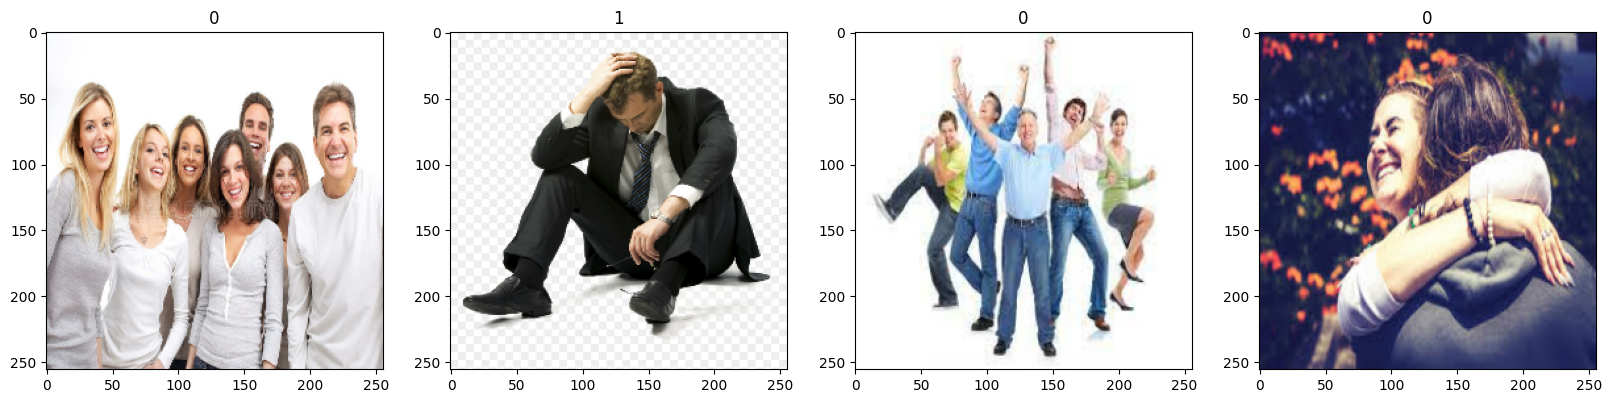

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    
# 0 is sad and 1 is happy

In [ ]:
data = data.map(lambda x,y: (x/255, y))
# normalizing the data to be between 0 and 1



In [ ]:
data.as_numpy_iterator().next()


Split data into train and test and validation

In [19]:

print(len(data))
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1
print(train_size, val_size, test_size)

# length of dataset is 8 batches

8
5 2 1


In [20]:
train=data.take(train_size)
validation=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

Build model

In [21]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [23]:

from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.models import Sequential


In [24]:
model = Sequential()


Defining the model architecture

In [25]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
# 16 filters, 3x3 kernel, stride of 1, relu activation, input shape of 256x256x3
model.add(MaxPooling2D())
# max pooling layer
# Max pooling: This works by selecting the maximum value from every pool. Max Pooling retains the most prominent features of the feature map, and the returned image is sharper than the original image.

model.add(Conv2D(32, (3,3), 1, activation='relu'))
# 32 filters, 3x3 kernel, stride of 1, relu activation
model.add(MaxPooling2D())
# max pooling layer
model.add(Conv2D(16, (3,3), 1, activation='relu'))
# 16 filters, 3x3 kernel, stride of 1, relu activation
model.add(MaxPooling2D())
model.add(Flatten())
# flatten the output of the previous layer. Does not affect the batch size.
model.add(Dense(256, activation='relu'))
# fully connected layer with 256 neurons, relu activation
# Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function 
# passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer
# (only applicable if use_bias is True). These are all attributes of Dense.
model.add(Dense(1, activation='sigmoid'))
# output layer with 1 neuron, sigmoid activation ie 0 or 1;



In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [28]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
# tensorboard --logdir logs  in tensorboard

hist = model.fit(train, epochs=20, validation_data=validation, callbacks=[tensorboard_callback])
# training the model


Epoch 1/20
5/5 [==============================] - 8s 996ms/step - loss: 141.4820 - accuracy: 0.4875 - val_loss: 4.4989 - val_accuracy: 0.4688
Epoch 2/20
5/5 [==============================] - 5s 792ms/step - loss: 1.9382 - accuracy: 0.5312 - val_loss: 0.6558 - val_accuracy: 0.7344
Epoch 3/20
5/5 [==============================] - 5s 828ms/step - loss: 0.6404 - accuracy: 0.6562 - val_loss: 0.4018 - val_accuracy: 0.9219
Epoch 4/20
5/5 [==============================] - 5s 797ms/step - loss: 0.3409 - accuracy: 0.9000 - val_loss: 0.3360 - val_accuracy: 0.8750
Epoch 5/20
5/5 [==============================] - 5s 868ms/step - loss: 0.3098 - accuracy: 0.9250 - val_loss: 0.2636 - val_accuracy: 0.9375
Epoch 6/20
5/5 [==============================] - 5s 839ms/step - loss: 0.2555 - accuracy: 0.9500 - val_loss: 0.1934 - val_accuracy: 0.9844
Epoch 7/20
5/5 [==============================] - 5s 845ms/step - loss: 0.1806 - accuracy: 0.9500 - val_loss: 0.0919 - val_accuracy: 0.9844
Epoch 8/20
5/5 [==

Evaluvating the model

In [29]:
from tensorflow import keras
from keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()
# metrics classes



In [31]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    # x is the image and y is the label (0 or 1)
    yhat = model.predict(X)
    # yhat is the predicted label
    pre.update_state(y, yhat)
    # update the state of the metrics comparing y and yhat
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
    
print(pre.result(), re.result(), acc.result())



1/1 [==============================] - 0s 89ms/step
tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [32]:
model.save(os.path.join('models','imageclassifier.h5'))
# saving the model


Test

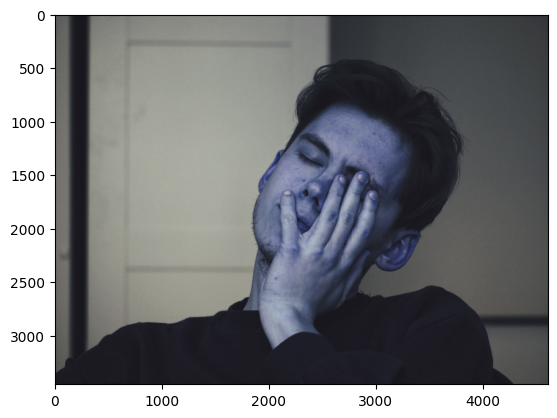

In [37]:
import cv2
img = cv2.imread('sad_test.jpg')
plt.imshow(img)
plt.show()
# open CV reads color in BGR format to convert to RGB we use cv2.COLOR_BGR2RGB


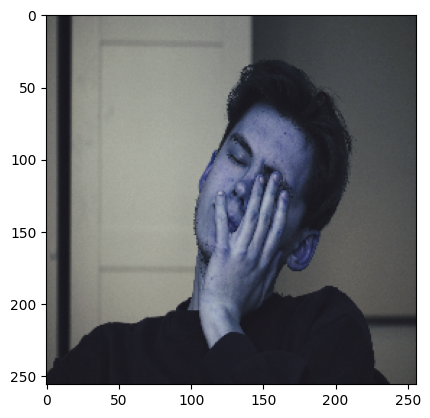

In [38]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [40]:
yhat = model.predict(resize.numpy().reshape(1,256,256,3))
print(yhat)

if yhat[0][0] > 0.5:
    print("Happy")
else:
    print("Sad")

1/1 [==============================] - 0s 40ms/step
[[0.02413872]]
Sad
